In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam, RMSprop
from keras import backend as K
from sklearn.model_selection import train_test_split

In [5]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

x_train = (train_df.iloc[:,1:].values).astype('float32')
x_test = (test_df.iloc[:,:].values).astype('float32')
y_train = train_df['label'].values

x_train, x_test, y_train,y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [7]:
x_train.shape

(33600, 784)

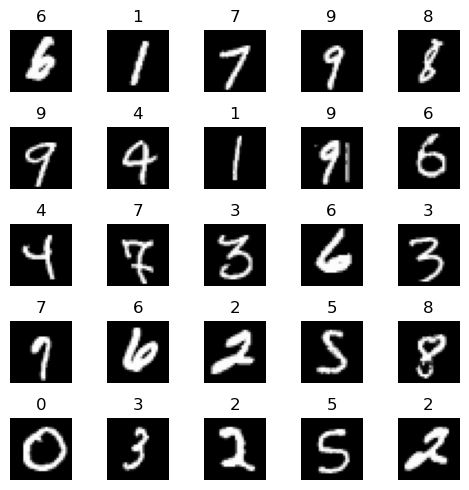

In [15]:
indexes = np.random.randint(0,x_train.shape[0],size=25)

images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = images[i].reshape(28,28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title('{}'.format(labels[i]))
    
plt.tight_layout()
plt.show()

In [17]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [20]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [22]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dropout((0.5)))
model.add(Dense(128, activation='relu'))
model.add(Dropout((0.5)))
model.add(Dense(num_labels, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
263/263 [==============================] - 2s 4ms/step - loss: 0.6687 - accuracy: 0.7896
Epoch 2/10
263/263 [==============================] - 1s 4ms/step - loss: 0.3016 - accuracy: 0.9110
Epoch 3/10
263/263 [==============================] - 1s 4ms/step - loss: 0.2330 - accuracy: 0.9314
Epoch 4/10
263/263 [==============================] - 1s 3ms/step - loss: 0.1927 - accuracy: 0.9427
Epoch 5/10
263/263 [==============================] - 1s 3ms/step - loss: 0.1678 - accuracy: 0.9495
Epoch 6/10
263/263 [==============================] - 1s 3ms/step - loss: 0.1540 - accuracy: 0.9542
Epoch 7/10
263/263 [==============================] - 1s 3ms/step - loss: 0.1399 - accuracy: 0.9587
Epoch 8/10
263/263 [==============================] - 1s 4ms/step - loss: 0.1299 - accuracy: 0.9599
Epoch 9/10
263/263 [==============================] - 1s 3ms/step - loss: 0.1215 - accuracy: 0.9638
Epoch 10/10
263/263 [==============================] - 1s 4ms/step - loss: 0.1093 - accuracy: 0.9665

In [25]:
loss, acc = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss)
print('Test accuracy:', acc)

66/66 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9727
Test loss: 0.10008031874895096
Test accuracy: 0.9727380871772766
